### Data Load

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv("../data/diabetes.csv")

# Separar features (X) e target (y)
X = df.drop("Outcome", axis=1) 
y = df["Outcome"]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Part A
### 1.

k=2, SSE=121.2579
k=3, SSE=105.9702
k=4, SSE=95.2363
k=5, SSE=88.5767
k=6, SSE=82.2146
k=7, SSE=78.2958
k=8, SSE=73.4088
k=9, SSE=71.4739
k=10, SSE=68.8528
k=11, SSE=65.6986


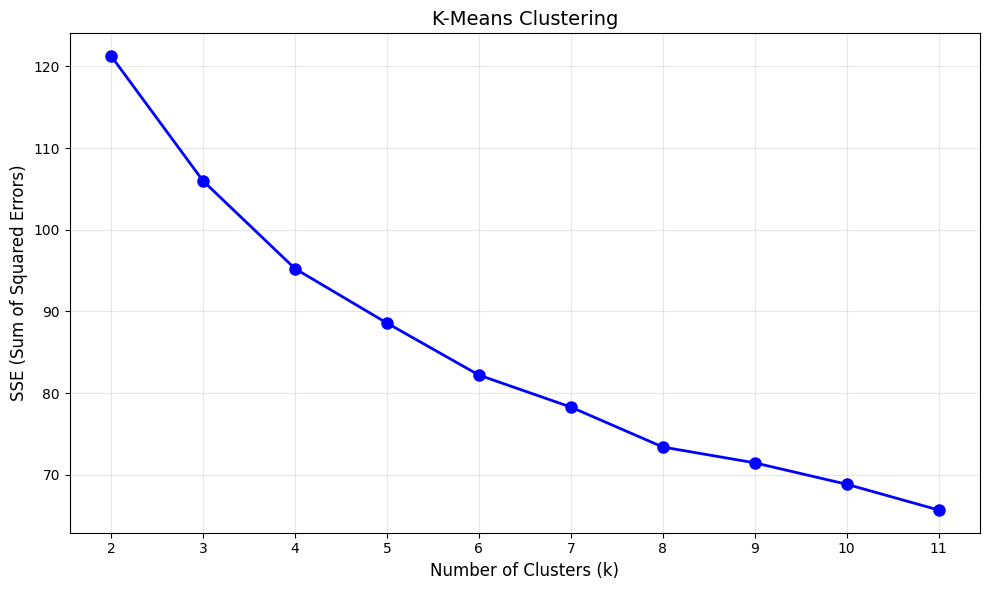

In [47]:
# Apply K-Means for k = 2 to 11
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)
    print(f"k={k}, SSE={kmeans.inertia_:.4f}")

# Plot SSE vs number of clusters (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("K-Means Clustering", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()  

### 2.  


In [48]:
# Apply K-Means with k=6
kmeans = KMeans(n_clusters=6, max_iter=500, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Assign each cluster to the majority class
cluster_to_class = {}
for cluster_id in range(6):
    # Get all true labels for this cluster
    cluster_mask = cluster_labels == cluster_id
    cluster_true_labels = y[cluster_mask]

    # Find majority class
    majority_class = cluster_true_labels.mode()[0]
    cluster_to_class[cluster_id] = majority_class

    # Print cluster information
    class_0_count = (cluster_true_labels == 0).sum()
    class_1_count = (cluster_true_labels == 1).sum()
    print(
        f"Cluster {cluster_id}: Class 0={class_0_count}, Class 1={class_1_count}, "
        f"Majority Class={majority_class}"
    )

# Predict labels based on majority class of each cluster
y_pred = np.array([cluster_to_class[cluster] for cluster in cluster_labels])

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"True Negatives : {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives : {cm[1, 1]}\n")

# Compute metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Cluster 0: Class 0=61, Class 1=73, Majority Class=1
Cluster 1: Class 0=254, Class 1=26, Majority Class=0
Cluster 2: Class 0=43, Class 1=26, Majority Class=0
Cluster 3: Class 0=19, Class 1=16, Majority Class=0
Cluster 4: Class 0=74, Class 1=51, Majority Class=0
Cluster 5: Class 0=49, Class 1=76, Majority Class=1

Confusion Matrix:
[[390 110]
 [119 149]]
True Negatives : 390
False Positives: 110
False Negatives: 119
True Positives : 149

Accuracy:  0.7018
Precision: 0.5753
Recall:    0.5560
F1-Score:  0.5655


The k-means classification model with k=6 produced an accuracy of approximately 70.18%, with a precision of 57.53%, recall of 55.60%, and an F1-score of 56.55%. While the accuracy appears moderately acceptable, the relatively low precision, recall, and F1-score indicate that the model struggles to correctly distinguish between classes. This happens because clustering algorithms like k-means are unsupervised and do not use class labels during training, meaning the resulting clusters may not align well with the true class boundaries. Therefore, although clustering can reveal underlying data structures, it is not well-suited for classification tasks where the goal is accurate label prediction. In practice, supervised learning methods such as logistic regression or decision trees are more appropriate and typically yield better classification performance.


### 3.

In [49]:
# Print class distribution for each cluster
for cluster_id in range(6):
    cluster_mask = cluster_labels == cluster_id
    cluster_true_labels = y[cluster_mask]
    
    class_0_count = (cluster_true_labels == 0).sum()
    class_1_count = (cluster_true_labels == 1).sum()
    total = class_0_count + class_1_count
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Total observations: {total}")
    print(f"  Class 0 (No Diabetes): {class_0_count} ({class_0_count/total*100:.1f}%)")
    print(f"  Class 1 (Diabetes):    {class_1_count} ({class_1_count/total*100:.1f}%)")
    print(f"  Majority class: {cluster_to_class[cluster_id]}")

# Denormalize cluster centers
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
feature_names = X.columns

for cluster_id in range(6):
    print(f"\nCluster {cluster_id} Center:")
    for feature, value in zip(feature_names, cluster_centers_original[cluster_id]):
        print(f"  {feature}: {value:.2f}")


#


Cluster 0:
  Total observations: 134
  Class 0 (No Diabetes): 61 (45.5%)
  Class 1 (Diabetes):    73 (54.5%)
  Majority class: 1

Cluster 1:
  Total observations: 280
  Class 0 (No Diabetes): 254 (90.7%)
  Class 1 (Diabetes):    26 (9.3%)
  Majority class: 0

Cluster 2:
  Total observations: 69
  Class 0 (No Diabetes): 43 (62.3%)
  Class 1 (Diabetes):    26 (37.7%)
  Majority class: 0

Cluster 3:
  Total observations: 35
  Class 0 (No Diabetes): 19 (54.3%)
  Class 1 (Diabetes):    16 (45.7%)
  Majority class: 0

Cluster 4:
  Total observations: 125
  Class 0 (No Diabetes): 74 (59.2%)
  Class 1 (Diabetes):    51 (40.8%)
  Majority class: 0

Cluster 5:
  Total observations: 125
  Class 0 (No Diabetes): 49 (39.2%)
  Class 1 (Diabetes):    76 (60.8%)
  Majority class: 1

Cluster 0 Center:
  Pregnancies: 1.88
  Glucose: 149.47
  BloodPressure: 74.47
  SkinThickness: 34.19
  Insulin: 209.57
  BMI: 37.07
  DiabetesPedigreeFunction: 0.62
  Age: 29.13

Cluster 1 Center:
  Pregnancies: 1.77
  G

The class distribution analysis shows that the three most discriminative clusters are Clusters 1, 2, and 5, with purities of 90.7%, 62.3%, and 60.8%, respectively.

- Cluster 1, which is predominantly composed of non-diabetic individuals (90.7%), is characterized by low glucose levels (≈99 mg/dL), young age (≈25 years), moderate BMI (≈30), and few pregnancies. This cluster represents metabolically healthy individuals with a low risk of developing diabetes.

- Cluster 2, also mostly composed of non-diabetic individuals (62.3%), shows higher glucose levels (≈135 mg/dL) and blood pressure (≈80 mmHg), as well as an older average age (≈57 years). This group can be interpreted as representing individuals at increased risk, possibly pre-diabetic or affected by age-related metabolic changes.

- Cluster 5, which contains mostly diabetic individuals (60.8%), exhibits a higher number of pregnancies (≈8.5), elevated glucose (≈130 mg/dL), high insulin levels (≈121 µU/mL), increased BMI (≈34), and a middle age (≈44 years). These characteristics are typical of patients with metabolic syndrome and Type 2 diabetes.

In summary, the K-Means model was able to identify clinically coherent patterns: healthy individuals (Cluster 1), at-risk individuals (Cluster 2), and diabetic patients (Cluster 5). However, the purity values below 100% highlight that K-Means, being an unsupervised learning method, cannot perfectly separate the classes. Instead, it serves as an exploratory tool useful for identifying groups of patients with similar clinical profiles.

## Part B
### 1.


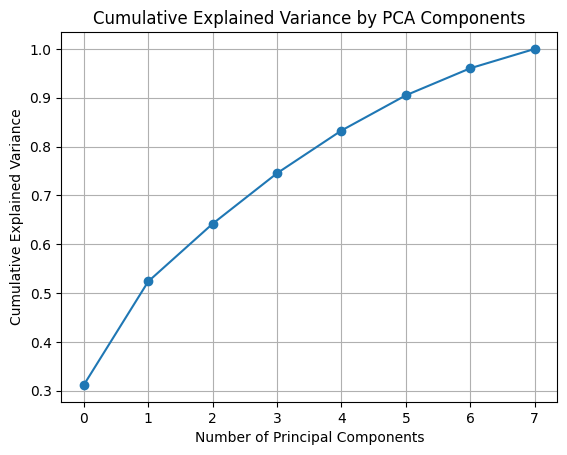

In [50]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.show()

By analysing the PCA plot, we should retained 4 principal components to explain at least 80%.

### 2.


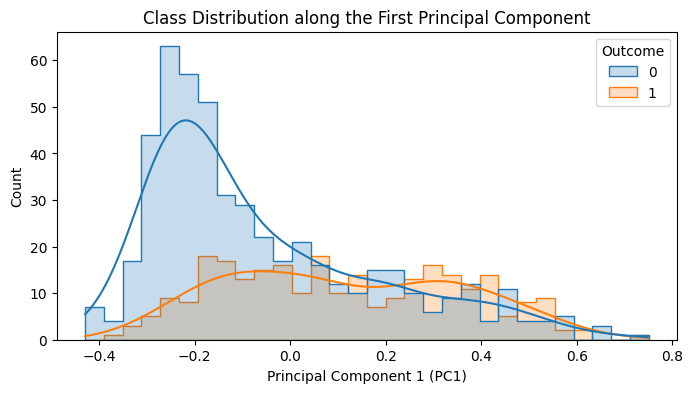

In [51]:
# Suppose y contains the target class (0 = No Diabetes, 1 = Diabetes)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 4))
sns.histplot(x=X_pca[:, 0], hue=y, kde=True, element="step", bins=30)
plt.title("Class Distribution along the First Principal Component")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Count")
plt.show()


The histogram of the class distribution along the first principal component (PC1) shows a substantial overlap between the two classes.
Although diabetic patients (Class 1) tend to have slightly higher PC1 scores, reflecting higher glucose, BMI, and insulin levels, the distributions are not clearly separated.

This indicates that PC1 captures general variance in metabolic variables rather than features that strictly distinguish diabetic from non-diabetic individuals.

Therefore, a single PCA component is insufficient for class discrimination, as PCA is an unsupervised technique that maximizes variance, not class separability.

### 3.

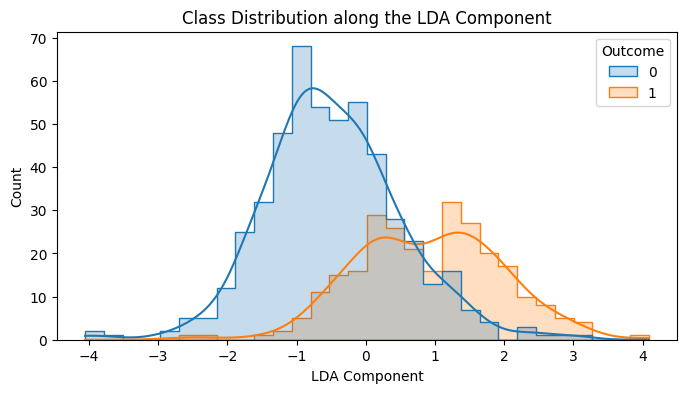

In [52]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8, 4))
sns.histplot(x=X_lda[:, 0], hue=y, kde=True, element="step", bins=30)
plt.title("Class Distribution along the LDA Component")
plt.xlabel("LDA Component")
plt.ylabel("Count")
plt.show()

The Linear Discriminant Analysis (LDA) projection shows a noticeably better class separation compared to the PCA projection.
In the LDA component, the distributions of diabetic (Class 1) and non-diabetic (Class 0) individuals are more distinct, with diabetic patients generally having higher LDA scores.

This indicates that LDA successfully identifies a linear combination of features — mainly glucose, BMI, and insulin — that best discriminates between the two classes, even though there is still some overlap.


## 4.
Based on the results obtained:

- PCA is an unsupervised dimensionality reduction technique. It maximizes the overall variance in the dataset without considering class labels. As observed in the PCA plot, the distributions of diabetic and non-diabetic individuals overlap heavily along the first principal component. This makes PCA unsuitable for building a discriminant rule, because it does not focus on features that separate classes.

- LDA, on the other hand, is a supervised technique that explicitly maximizes the ratio of between-class variance to within-class variance. The LDA plot shows a clearer separation between diabetic and non-diabetic classes. The component produced by LDA captures the directions in feature space that best discriminate the classes, making it directly appropriate for classification purposes.

Conclusion:

LDA would be more appropriate than PCA for building a discriminant rule, because it has better class separability. PCA, while useful for reducing dimensionality and capturing variance, does not guarantee discrimination between classes and would therefore be less effective for classification tasks in this context.

<!-- ### 4.

Based on the results obtained:

- PCA is an unsupervised dimensionality reduction technique. It maximizes the overall variance in the dataset without considering class labels. As observed in the PCA plot, the distributions of diabetic and non-diabetic individuals overlap heavily along the first principal component. This makes PCA unsuitable for building a discriminant rule, because it does not focus on features that separate classes.

- LDA, on the other hand, is a supervised technique that explicitly maximizes the ratio of between-class variance to within-class variance. The LDA plot shows a clearer separation between diabetic and non-diabetic classes. The component produced by LDA captures the directions in feature space that best discriminate the classes, making it directly appropriate for classification purposes.

Conclusion:

LDA would be more appropriate than PCA for building a discriminant rule, because it has better class separability. PCA, while useful for reducing dimensionality and capturing variance, does not guarantee discrimination between classes and would therefore be less effective for classification tasks in this context. -->